In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [16]:
df = pd.read_csv('./Ch7/Burger_king_items.txt', sep='\t')
df.columns

Index(['Item', 'Serving.size', 'Calories', 'Fat.Cal', 'Protein(g)', 'Fat(g)',
       'Sat.Fat(g)', 'Trans.fat(g)', 'Chol(mg)', 'Sodium(mg)', 'Carbs(g)',
       'Fiber(g)', 'Sugar(g)', 'Meat', 'Breakfast', 'Not Breakfast',
       'CarbsxMeat'],
      dtype='object')

In [17]:
x = df['Protein(g)'].mean()
y = df['Fat(g)'].mean()
x_sd = df['Protein(g)'].std()
y_sd = df['Fat(g)'].std()

corr = df['Protein(g)'].corr(df['Fat(g)'])

b1 = corr*(y_sd/x_sd)
b1

0.9131342674466059

In [20]:
df = pd.read_csv('./Ch7/Tompkins_county_bridges_2016.txt', sep='\t')
df.columns

Index(['Municipality', 'Location', 'Route', 'Owner', 'Built', 'Date.Inspected',
       'SD.FO.Status', 'Condition', 'YearInspected', 'AgeAtInspection'],
      dtype='object')

Who: New-York bridges
what: when it was built and the safety score
when: 2016
where: USA newyork state
How: people goes there and check
why: public safety


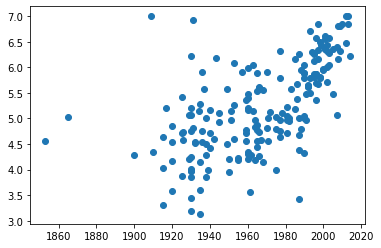

In [22]:
plt.scatter(df.Built, df.Condition)

Correlation: -0.61, x_mean = 48.97, y_mean = 5.23, x_std = 30.60, y_std = 0.88
y hat = 6.09 + -0.02*x


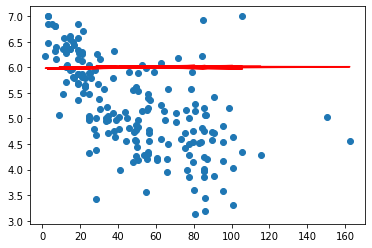

In [53]:
x = df.AgeAtInspection
y = df.Condition

corr = y.corr(x)
x_mean = x.mean()
x_std = x.std()
y_mean = y.mean()
y_std = y.std()
print(f'Correlation: {corr:0.2f}, x_mean = {x_mean:0.2f}, y_mean = {y_mean:0.2f}, x_std = {x_std:0.2f}'
f', y_std = {y_std:0.2f}')

b1 = corr*(y_std/x_std)
b0 = y_mean - b1*x_mean
print(f'y hat = {b0:0.2f} + {b1:.2f}*x')

plt.scatter(x, y)
plt.plot(x, b0 + b1*y, color='red')

# Just checking
size = -2
price = 8400 + 88.67 * size
priceWe can expect, on average, for bridges that are a year younger to be 0.02 point safer.

In [6]:
# Just checking
size = 1
sd = 0.76 * size
sd

0.76

In [13]:
sd_price = 77000
y_price = 168000
0.76*sd_price
y_price + 0.76*sd_price

y_size = 1800
sd_size = 660

pred = 8400 + 88.67*2460
print(pred)

b1 = 0.76*(sd_price/sd_size)
b0 = y_price - b1*y_size
print(b0, b1)

226528.2
8400.0 88.66666666666667


1. 0.76
2. -1.52 sd
3. It would be 0.5 above the mean in square feet since there is a perfect correlation between square meters and square feet.
4. 58 520 above the mean price
5. 226 520
6. 

In [14]:
pressure = 920
pred = 1028.18 - 0.972*pressure
pred

133.94000000000005

In [15]:
e = pred - 150
e

-16.059999999999945

# Residual
I'm gonna calculate the residual and plot the residuals against the y and x values.
I' gonn calculate the residual sd and plot an histogram

In [31]:
x = df['Protein(g)'].mean()
y = df['Fat(g)'].mean()
x_sd = df['Protein(g)'].std()
y_sd = df['Fat(g)'].std()

corr = df['Protein(g)'].corr(df['Fat(g)'])

b1 = corr*(y_sd/x_sd)
b0 = y - b1*x

residual = [b0+b1*a for a in df['Protein(g)']]
residual = residual - df['Fat(g)']
residual_squared = [a**2 for a in residual]
e = sqrt(sum(residual_squared)/(df.shape[0]-2))
e

10.570739718301777

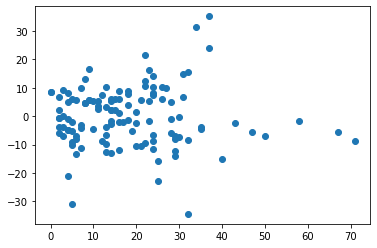

In [37]:
plt.scatter(df['Protein(g)'], residual)

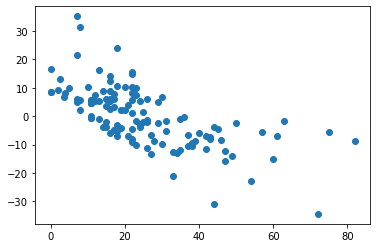

In [35]:
plt.scatter(df['Fat(g)'], residual)

(array([ 2.,  2.,  3., 26., 32., 32., 17.,  4.,  2.,  2.]),
 array([-34.37755407, -27.42098694, -20.46441981, -13.50785267,
         -6.55128554,   0.40528159,   7.36184873,  14.31841586,
         21.274983  ,  28.23155013,  35.18811726]),
 <BarContainer object of 10 artists>)

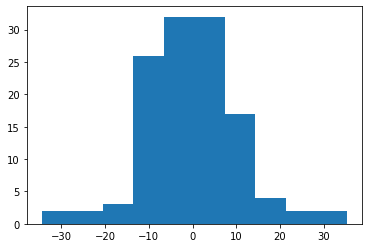

In [36]:
plt.hist(residual)

In [4]:
# Just checking
size = 2
price = 8400 + 88.67 * size

r_squared = 57.8
sd_residual = 53790

7. It means that 57.8% of the price variation is explain by the size.
8. the correlation is positive since the coefficient of the least square line is positive.
9. It is just a 1 SD variation. It is not particularly large since 68% of data is comprised between -1 anf 1 SD.

In [3]:
# Cereals

df = pd.read_csv('./Ch7/Cereals.txt', sep='\t')
df.columns

Index(['name', 'mfr', 'calories', 'sugars', 'carbo', 'protein', 'fat',
       'sodium', 'fiber', 'potass', 'shelf', 'Middle', 'shelf_1', 'shelf_2',
       'shelf_3'],
      dtype='object')

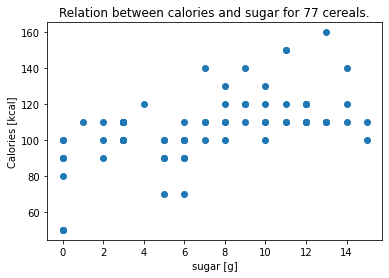

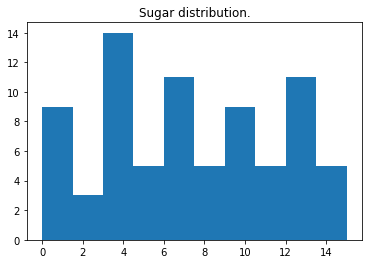

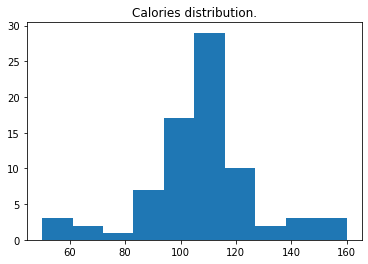

In [33]:
df = pd.read_csv('./Ch7/Cereals.txt', sep='\t')
df.columns

sugar = df['sugars']
cal = df['calories']

plt.scatter(sugar, cal)
plt.xlabel('sugar [g]')
plt.ylabel('Calories [kcal]')
plt.title('Relation between calories and sugar for 77 cereals.')
plt.show()

plt.hist(sugar)
plt.title('Sugar distribution.')
plt.show()

plt.hist(cal)
plt.title('Calories distribution.')
plt.show()

In [6]:
sugar_mean = sugar.mean()
sugar_std = sugar.std()
sugar_median = sugar.median()
sugar_iqr = sugar.quantile(0.75) - sugar.quantile(0.25)

cal_mean = cal.mean()
cal_std = cal.std()
cal_median = cal.median()
cal_iqr = cal.quantile(0.75) - cal.quantile(0.25)

cor = sugar.corr(cal)

b1 = cor * cal_std / sugar_std
b0 = cal_mean - b1*sugar_mean

print('          Mean     St     Median   IQR')
print(f'Sugar     {sugar_mean:.2f}     {sugar_std:.2f}    {sugar_median}     {sugar_iqr}')
print(f'Calories  {cal_mean:.2f}   {cal_std:.2f}  {cal_median}   {cal_iqr}')
print(f'Correlation : {cor:.2f}')
print(f'Least square line : cal hat = {b0:.2f} + {b1:.2f}*sugar')

          Mean     St     Median   IQR
Sugar     6.94     4.42    7.0     8.0
Calories  106.88   19.48  110.0   10.0
Correlation : 0.56
Least square line : cal hat = 89.65 + 2.49*sugar


In [7]:
# Model analysis

prediction = [b0+b1*x for x in sugar]
residuals = cal - prediction

pred_std = np.std(prediction)
e = sum(residuals**2) / (len(residuals)-2)

s_e = residuals.std()
r_squared = cor**2
print(f'''
e = {e:.2f}
s_e = {s_e:.2f}
r^2 = {r_squared:.2f}

{s_e**2 / cal_std**2 }
''')


e = 262.28
s_e = 16.09
r^2 = 0.32

0.6817999669657488



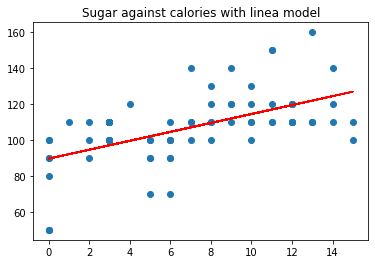

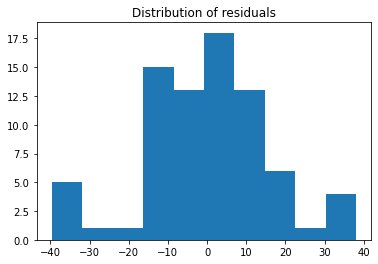

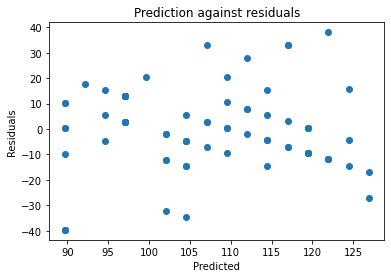

In [9]:
plt.scatter(sugar, cal)
plt.plot(sugar, prediction, color='red', label='Linear regression')
plt.title('Sugar against calories with linea model')
plt.show()

plt.hist(residuals)
plt.title('Distribution of residuals')
plt.show()

plt.scatter(prediction, residuals, )
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Prediction against residuals')
plt.show()

# Exercice 1
a. It is wrong. The linear model we choose may not pass through a single point. It is the one that has the least error with every point.

b. Yes it is

c. False, it is the sum of the square of all the residuals that is minimized.

# Exercice 3
It means that, on average, we expect that the weight of a newborn will be 0.1875 kg bigger if the lenght is a cm bigger.

In [10]:
df = pd.read_csv('./Ch7/Bookstore_sales.txt', sep='\t')
df.columns

Index(['Number of Sales People Working', 'Sales (in $1000)'], dtype='object')

In [25]:
df.iloc[:, 1]

0    10
1    11
2    13
3    14
4    18
5    20
6    20
7    22
8    22
9    26
Name: Sales (in $1000), dtype: int64

In [11]:
x_mean = 10.4
y_mean = 17.6
x_std = 5.64
y_std = 5.34
r = 0.965

b1 = r*y_std/x_std
b0 = y_mean - b1*x_mean
b1, b0

(0.9136702127659574, 8.097829787234044)

b. It means that, on variation, the bookstore will make $910 more for 1 more sale people working.
The intercept means that if there is no worker, the shop makes $8000.
It is plausible. 9 000 for one sales people is too much 90 is too low.

sales = 8.1 + 0.91*number

In [27]:
def model(x):
    return (b1*x + b0)
pred = model(18)
print(f'For 18 people the booksore would make ${model(18):.2f}.')
print(f'Residual: ${25000-pred:.2f} and we have underestimated the value.')

For 18 people the booksore would make $24.54.
Residual: $24975.46 and we have underestimated the value.


In [28]:
prediction = [model(x) for x in df.iloc[:, 0]]
residuals = [a - b for a in df.iloc[:, 1] for b in prediction]


a. Unit of the residual is 1000 of dollars
b. It is 2.77 that contribute the most.
c. The least is 0.07

In [31]:
corr = df.iloc[:, 0].corr(df.iloc[:,1])
r_squared = corr**2
r_squared

0.9319324728296398

# Exercice 13
a. It is not straight enough
b. there is an outlierm
c. It thinckens

In [38]:
# exercice 15
df = pd.read_csv('./Ch7/Cereals.txt', sep='\t')
df.columns

x = df['fiber']
y = df['potass']


38 + 27*9

281

# Exercice 17 19
We expect that, on average, an increase of 27 g of potassium for an increase of 1g of fiber

It the residual is negative. It means that our model has overestimated the amount of potassium.

In [40]:
# Exercice 21
r = 0.903
r_s = r**2
print(f' The fraction of the data explained by our model is {r_s * 100:3.1f}%')

 The fraction of the data explained by our model is 81.5 %


# Exercice 23
It means that the ditribution of error std 30.77. 68% of the prediction's error  is comprised between +30.77 g and -30.77g of potassium.

In [5]:
# Exercice 37
df = pd.read_csv('./Ch7/World_happiness_2020.txt', sep='\t')
df.columns

Index(['Country', 'Region', 'Happiness score', 'Log (GDP Per Capita)',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [23]:
x = df.iloc[:, 3]
y = df.iloc[:, 2]

r = df.iloc[:,3].corr(df.iloc[:, 2])
b1 = r*y.std()/x.std()
b0 = y.mean() - b1*x.mean()
r_squared = r**2
r_squared

0.6012054613274322

r = 77.5%. The linear model in Log GDP per Capita accounts for 77.5% of the variation in Happiness score.

In [13]:
print(f'''
Regression equation: y_hat = {b0:.2f} + {b1:.2f} log_gdp per capita
The slope means that for the happiness schore predicted by the model increase by 0.72 per one Log GDP PER CAPITA.
The intercept means that with 0 GDP, the score is negative which does not make any sense.

''')


Regression equation: y_hat = -1.20 + 0.72 log_gdp per capita
The slope means that for the happiness schore predicted by the model increase by 0.72 per one Log GDP PER CAPITA.



In [14]:
usa_predicted_score = b0 + b1 * 10.92577

In [18]:
6.94 - usa_predicted_score

0.29680033840460585

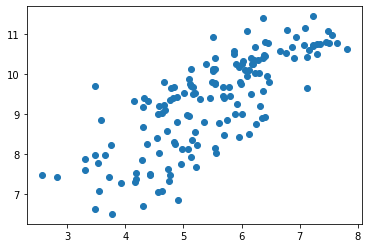

In [22]:
plt.scatter(x=y, y=x)

In [24]:
5715.9 - 2.78*2025

86.39999999999964

In [26]:
sqrt(0.814)

0.9022194854911968

In [27]:
def model_cig(x):
    return 0.148305 + 0.062163*x

model_cig(4)

0.396957

In [31]:
df = pd.read_csv('./Ch7/Cigarettes.txt', sep='\t')
x = df.TAR
y = df.Nicotine
b1 = x.corr(y)*y.std()/x.std()
model_cig(7)

0.583446

In [32]:
0.583446 + 0.05

0.6334460000000001

In [36]:
# Exercice 49
r = 0.624
y_mean = 342.3
y_std = 119.07
x_mean = 46210
x_std = 7003.55

b1 = r*y_std/x_std
b0 = y_mean - b1*x_mean
print(f'HCI hat = {b0:.2f} + {b1:.2f} MFI')

def linear_hci(x):
    return b0 + b1*x


print(f'MFI = 44 993, model predict {linear_hci(44993):.2f}')

HCI hat = -147.94 + 0.01 MFI
MFI = 44 993, model predict 329.39


In [37]:
548.02 - linear_hci(44993)

218.63098236751358

In [2]:
# Exercice 51
r = 0.037
age_mean = 29.67
age_std = 8.51
purchase_mean = 572.52
purchase_std = 253.62

b1 = r*purchase_std/age_std
b0 = purchase_mean - b1*age_mean

print(f'a. The regression line equation is: purchase = {b0:.2f} + {b1:.2f} age')

a. The regression line equation is: purchase = 539.80 + 1.10 age


b. not really, the scatter does not show a linear relationship.

In [3]:
def predict(x):
    return b0+b1*x

print(f'For a 18 years old, purchase prediction is {predict(18):.2f}, and for a 50 years old, prediction is {predict(50):.2f}')

For a 18 years old, purchase prediction is 559.65, and for a 50 years old, prediction is 594.94


In [5]:
print(f'The age account for {r**2*100:.2f}% of the variability in total purchase.')

The age account for 0.14% of the variability in total purchase.


In [7]:
df = pd.read_csv('./Ch7/SAT_scores.txt', sep='\t')
df.columns

Index(['Verbal', 'Math', 'Sex'], dtype='object')

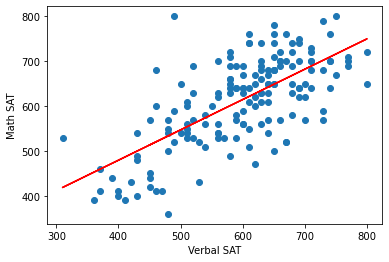

r=0.68, r^2=46.87%, b1=0.68


In [12]:
x = df.Verbal
y = df.Math
r = x.corr(y)
b1 = r*y.std()/x.std()
b0 = y.mean() - b1*x.mean()

plt.scatter(x, y)
plt.xlabel('Verbal SAT')
plt.ylabel('Math SAT')
plt.plot(x, b0 + b1*x, color='red')
plt.show()
print(f'r={r:.2f}, r^2={r**2*100:.2f}%, b1={b1:.2f}')

Correlation is 0.68. It means there is an association bettwen verbal and math score.
The slope means that there is an increase of the math score of .68 point for each point made in verbat sat.

In [13]:
b0 + b1*500

547.0915633845563

In [16]:
800 - (b0+b1*800)

50.38599946733075

# Exercice 57
For each year, the number of fire is down by 221.575.
It means that in 1985, there were 78 791.6.
The residual std is 12 397 fire. The average distance to the mean is 12 397 fires.
The r says that year account for 2.7% of the variability in fire.

In [19]:
df = pd.read_csv('./Ch7/Used_convertables_2020.txt', sep='\t')
x = df.Age
y = df.Price

Text(0, 0.5, 'Price')

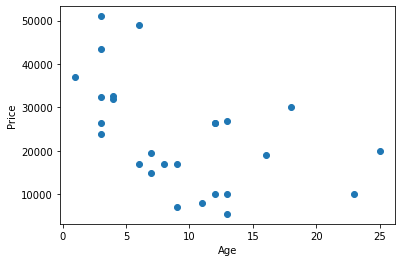

In [20]:
plt.scatter(x, y)
plt.xlabel('Age')
plt.ylabel('Price')

b. The association is moderately strong, negative and linear.

c. A linear model is appropriate. Both variables are quantitative, the scatter is straight enough and there is no obvious outlier.

In [21]:
r = x.corr(y)
r**2

0.24124474998929077

In [22]:
r

-0.49116672321044996

R squared means that age accounts for 24% of price variability.
There must be other variable like the type, the specificities of the car.

In [23]:
b1 = r*y.std()/x.std()
b0 = y.mean() - b1*x.mean()

print(f'Equation: price hat = {b0:.2f} + {b1:.2f}*age.')

Equation: price hat = 32791.12 + -984.49*age.


Each year, the car lose 984.49 dollars in value.

every car should cost 32 791 which does not make sense because we knows car come with different prices.

In [24]:
b0 + b1*10

22946.2381251966

In [25]:
b0 +b1*6

26884.190311418683

There is a huge residual, this car must be special or sold in canadian dollars.

In [26]:
b0 = 5.0112
b1 = -0.00513
r_s = 3.9
s = 0.6912


In [27]:
df = pd.read_csv('./Ch7/Climate_change_2019.txt', sep='\t')
df.columns

Index(['Year', 'Temp', 'CO2 '], dtype='object')

In [32]:
x = df['CO2 ']
y = df.Temp

r = x.corr(y)
r

0.957897931007594

It means that co2 account for 91.8% of the temperature variability.

In [35]:
b1 = r*y.std()/x.std()
b0 = y.mean() - b1*x.mean()
print(f' temp = {b0:.2f} + {b1:.4f}*co2')

 temp = -3.45 + 0.0106*co2


It means that for an increase of 1ppm of CO2 in the air, the temperature increase by 0.01 degree C.

The intercept is not meaningfull, there is always Co2 in the air. But without co2, the temperature would be -3.4527

The scatter is equality spread thoughout the graph, no pattern, no curve, no outlier.

In [34]:
b0 + b1*450

1.3377217299188793

No it is just a prediction. The true value will varie around this prediction.

In [36]:
df = pd.read_csv('./ch7/Bodyfat.txt', sep='\t')
df.columns

Index(['Density', 'Pct.BF', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Waist', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Bicep', 'Forearm',
       'Wrist'],
      dtype='object')

(0.1893763394743042, -14.693144537870417)

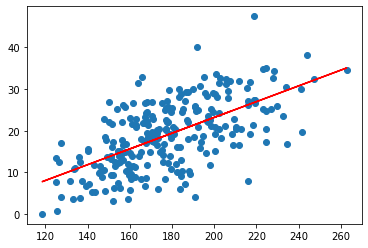

In [48]:
x = df.Weight
y = df['Pct.BF']
r = x.corr(y)

b1 = r*y.std()/x.std()
b0 = y.mean() - b1*x.mean()

def model(x):
    return b0+b1*x

plt.scatter(x, y)
plt.plot(x, model(x), 'red')
b1, b0

The body fat pct predicted is increasing by 0.189 for each pound of weight.

In [41]:
r**2

0.3810585969374137

In [49]:
predictions = [b0+b1*a for a in x]
residuals = y - predictions
residuals.std()

6.525124783439735

In [50]:
df = pd.read_csv('./Ch7/Hard_water.txt', sep='\t')
df.columns

Index(['Mortality', 'Calcium', 'Region'], dtype='object')

In [88]:
class linear_model:
    def __init__(self, method='pearson'):
        self.method = method
        
    def train(self, x, y):
        self.b1 = x.corr(y, self.method)*y.std()/x.std()
        self.b0 = y.mean() - self.b1*x.mean()
        self.r = x.corr(y)
        self.r_squared = self.r**2
        self.x = x
        self.y = y

    def predict(self, value):
        self.prediction = self.b0 + self.b1*value
        self.residuals = self.y - self.prediction
        return self.prediction
    
    def rundown_residuals(self):
        self.e = sqrt(self.residuals.sum()**2)/(len(self.residuals)-2)
        self.se = self.residuals.std()
        return {'e': self.e,
                'se': self.se,
                'r^2':self.r_squared
               }
    
    def plot_residuals(self):
        plt.scatter(self.residuals, self.y)
        plt.xlabel('Residuals')
        plt.ylabel('Observed values')
    
    def parameters(self):
        return self.b0, self.b1

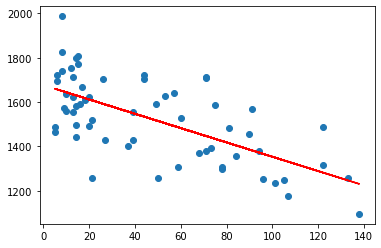

In [89]:
x = df.Calcium
y = df.Mortality
r = x.corr(y)

model = linear_model()
model.train(x, y)
plt.scatter(x, y)
plt.plot(x, model.predict(x), 'red')
plt.show()

The scatter plot shows a negative, linear and moderately strong association. A linear model is appropriate, no outliers, straight enough, no obvious outliers.

In [91]:
print(model.rundown_residuals())
print(model.parameters())

{'e': 5.00992844196952e-14, 'se': 141.83255027047474, 'r^2': 0.4288267193124972}
(1676.3556007011584, -3.226091606244151)


It means that the mortaly rate predicted by the model decrease by 3.23 for each ppm of calcium.

It means that our model overestimated the prediction by 348.6 death per 100 000 people.

It means that calcium concentration in water accounts for 43% of the death rate variability.

In [92]:
model.predict(100)

1353.7464400767433

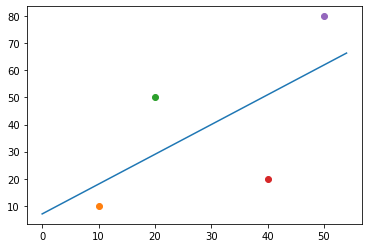

In [123]:
# Exercice 77
a = (10, 10)
b = (20, 50)
c = (40, 20)
d = (50, 80)
numbers = [a, b, c, d]

b0 = 7
b1 = 1.1

def line(x):
    return b0+1.1*x


x = np.arange(0, 55, 1)
plt.plot(x, line(x))
plt.plot(10 , 10, marker='o')
plt.plot(20 , 50, marker='o')
plt.plot(40 , 20, marker='o')
plt.plot(50 , 80, marker='o')

It is the line that have the minimun distance between the closest point on the line and the four points.

In [116]:
a = 0

for n in numbers:
    residual = n[1] - line(n[0])
    a += residual
print(a)

-7.105427357601002e-15


In [124]:
a = 0

for n in numbers:
    residual = n[1] - line(n[0])
    a += residual
print(a)

-7.105427357601002e-15
